In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from word_segmentation import *
from math import *
from class_unicode_mapper import *
from tamil_character_recognition import *
from PIL import Image, ImageFilter, ImageEnhance


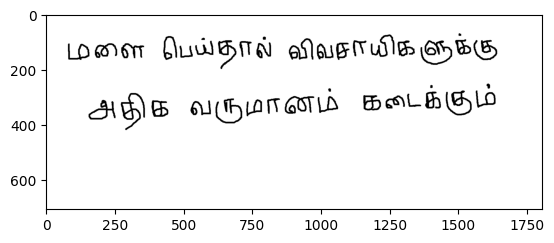

In [2]:
image = cv2.imread(r"D:/hari files/project/sf_project/sf_project/src/Datasets/handwritten_images/image12.png")
plt.imshow(image)

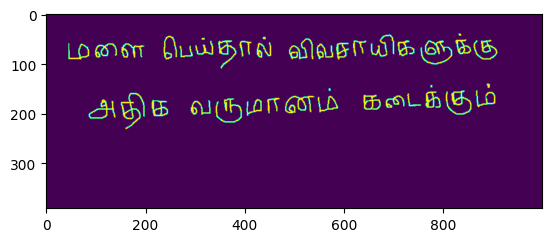

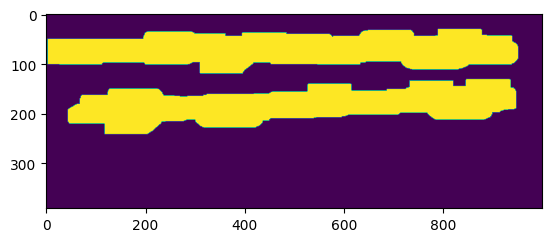

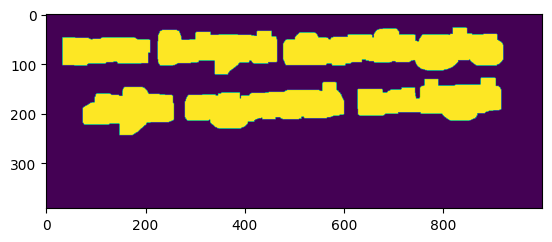

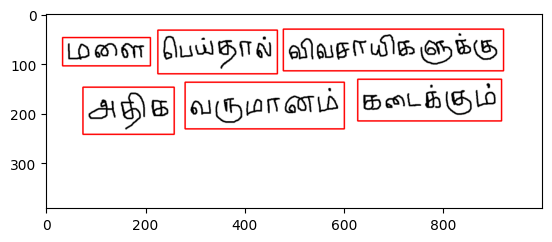

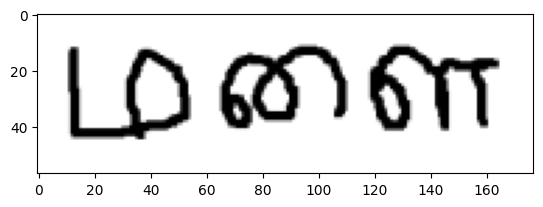

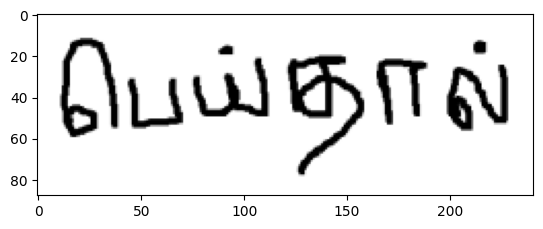

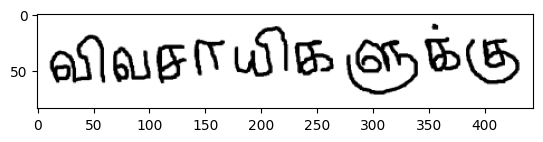

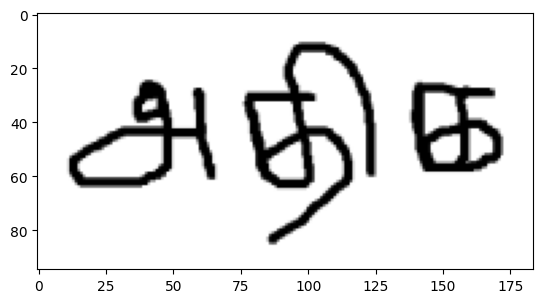

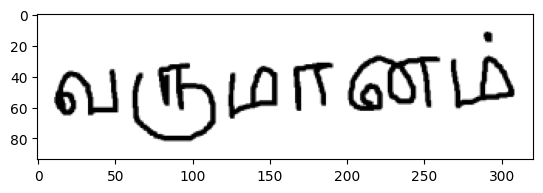

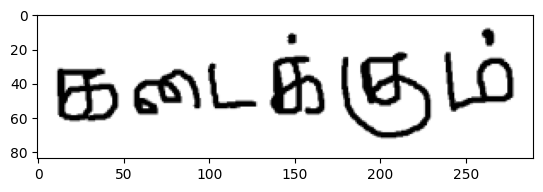

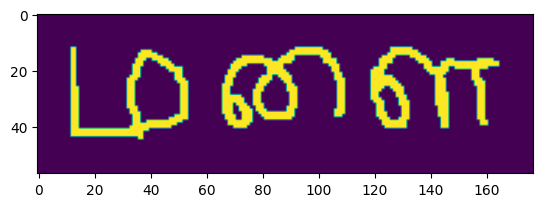

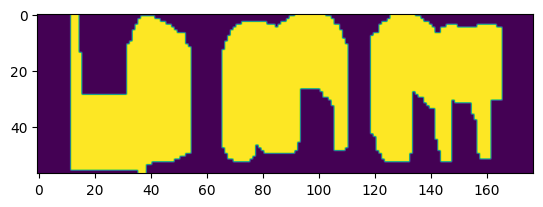

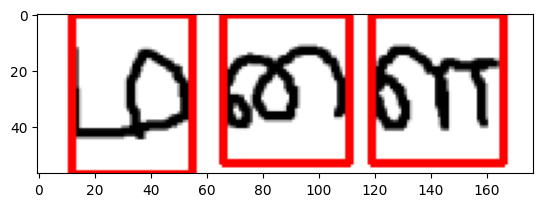

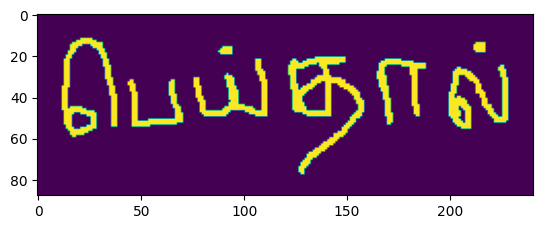

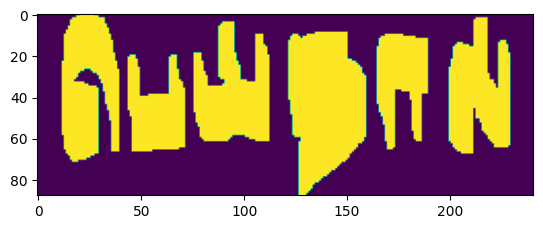

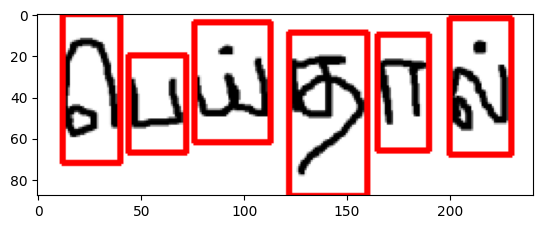

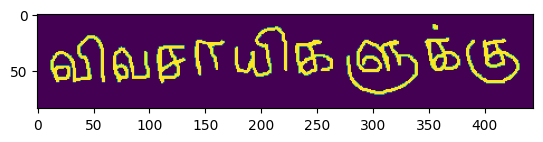

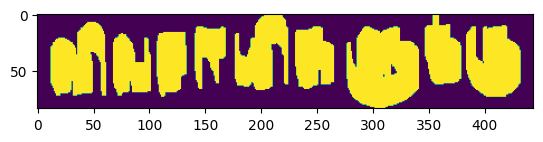

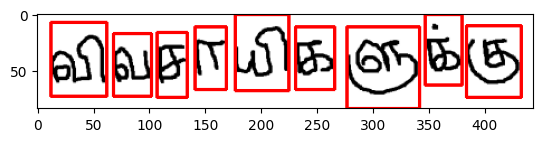

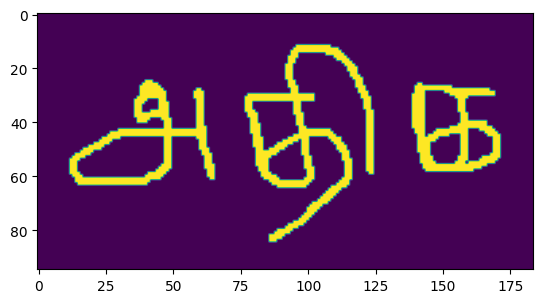

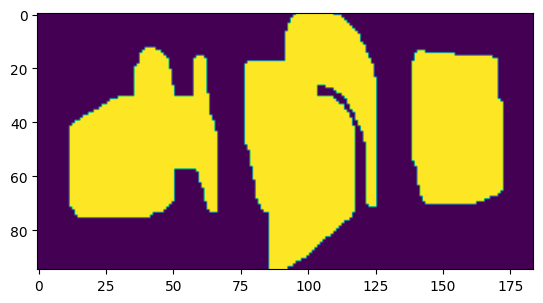

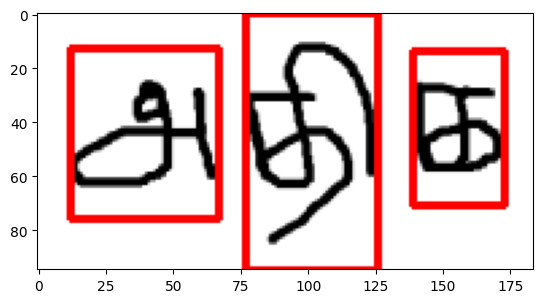

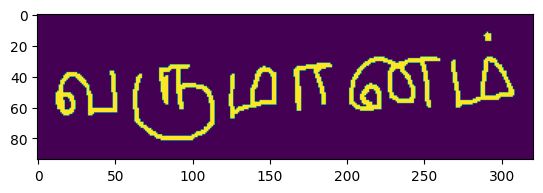

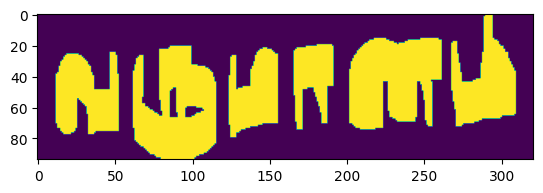

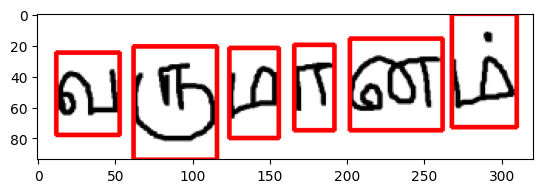

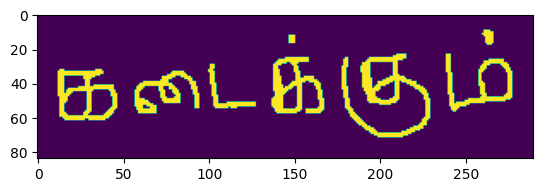

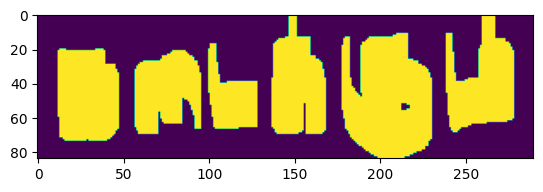

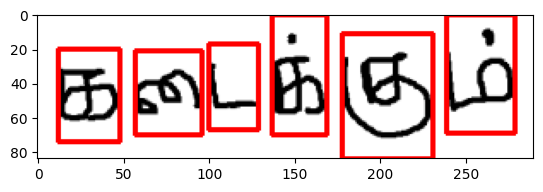

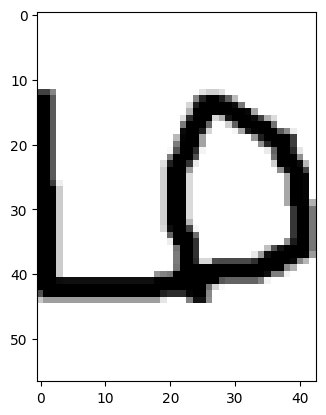

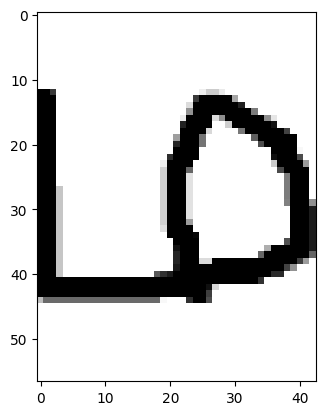

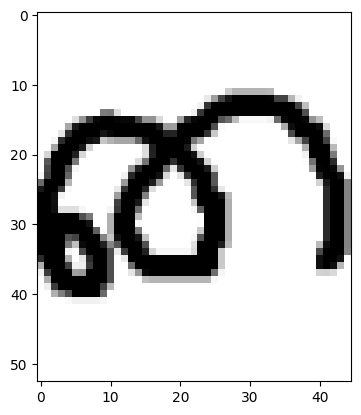

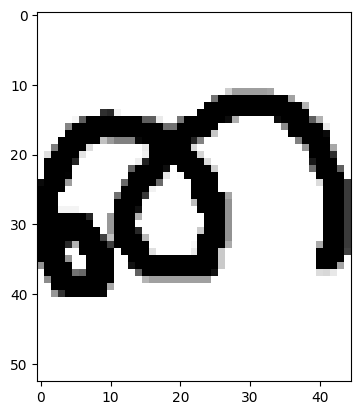

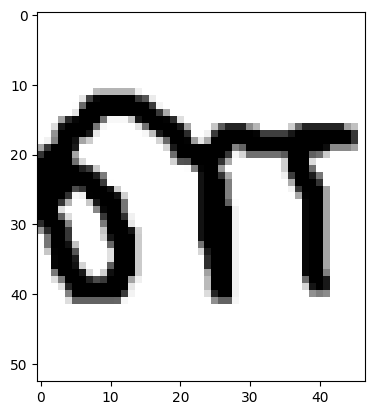

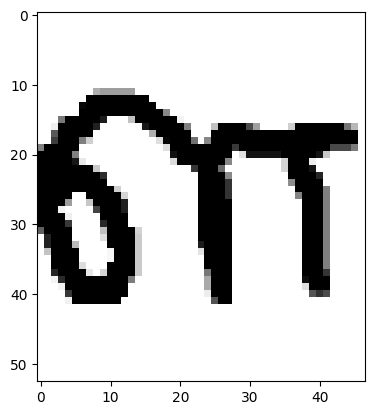

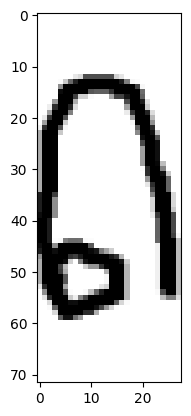

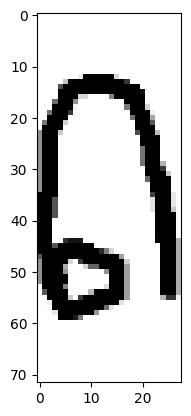

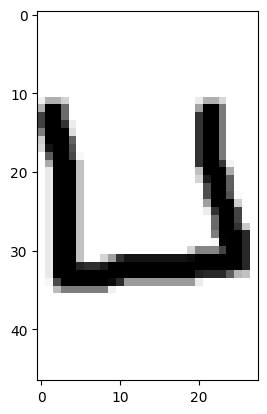

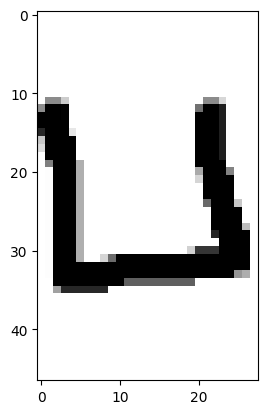

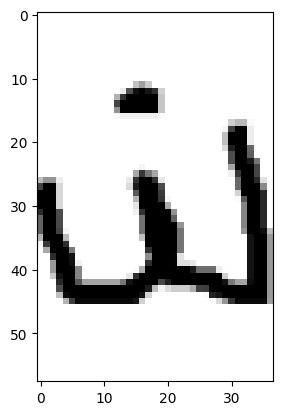

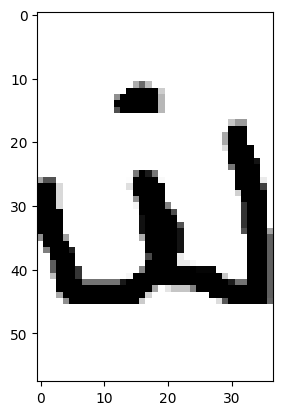

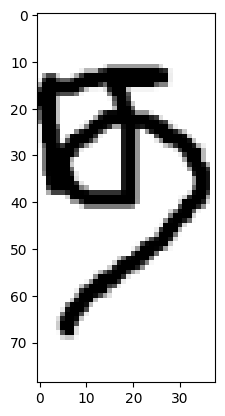

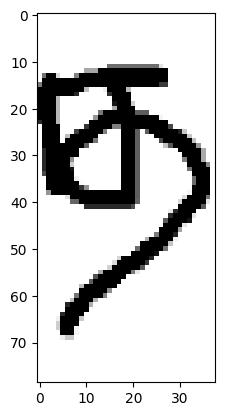

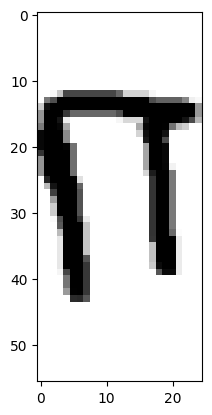

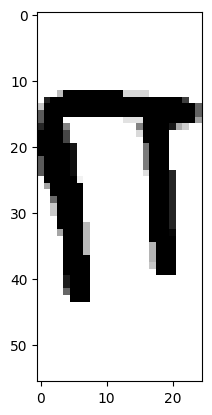

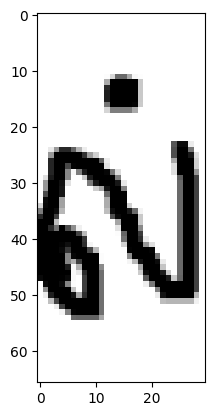

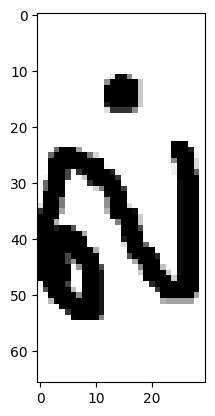

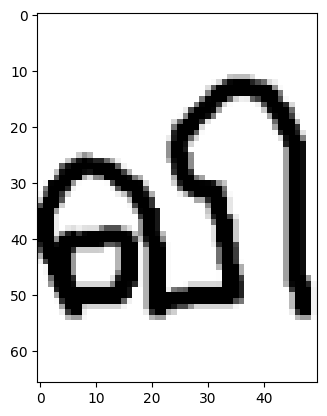

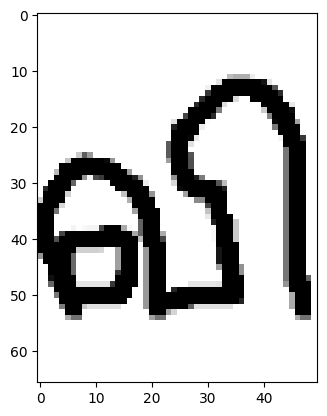

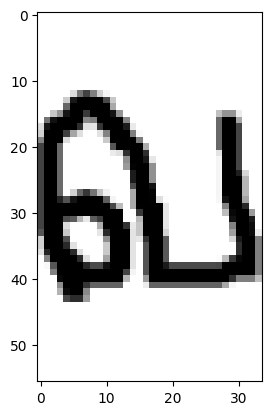

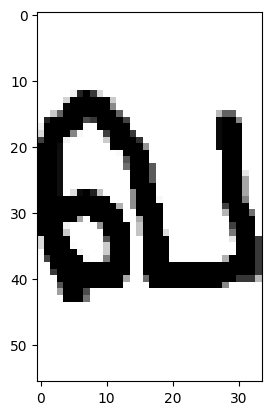

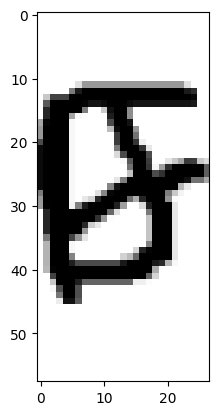

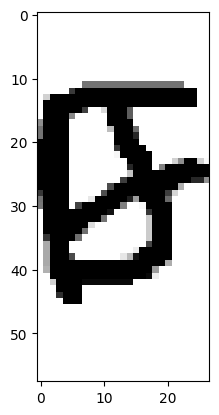

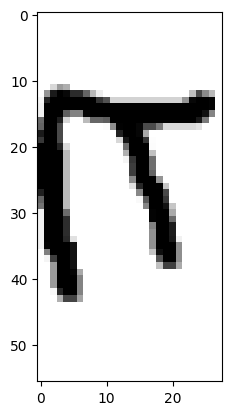

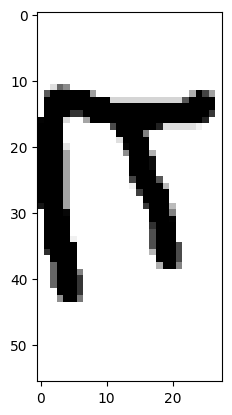

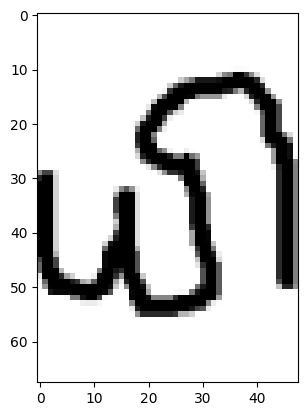

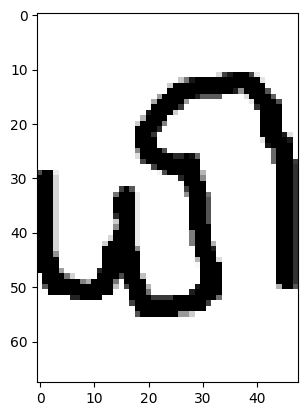

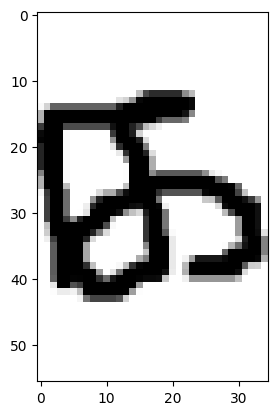

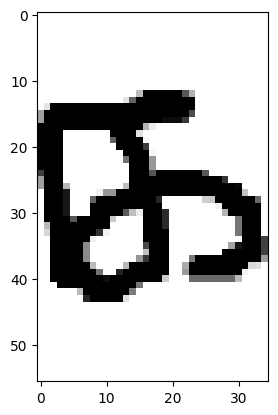

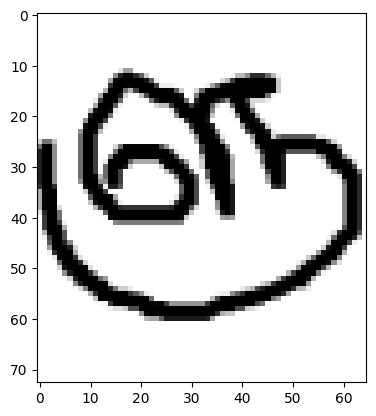

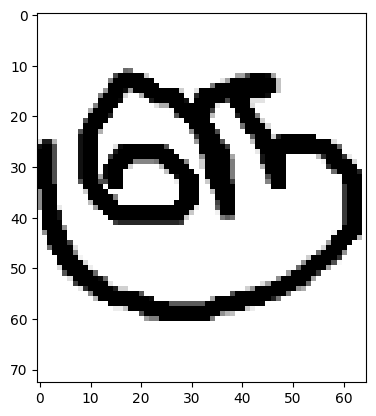

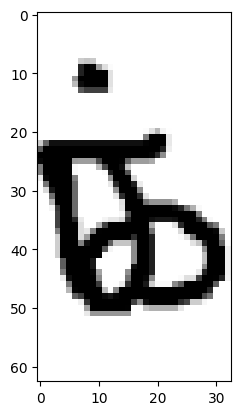

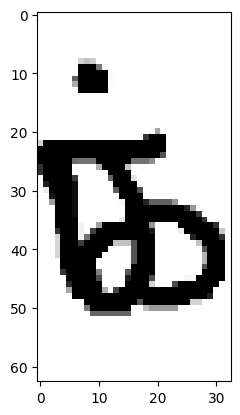

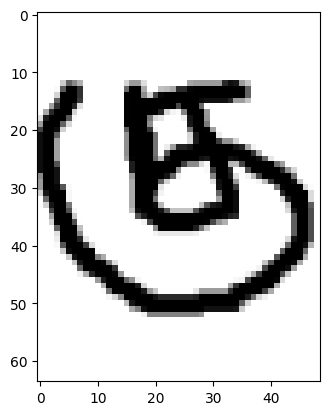

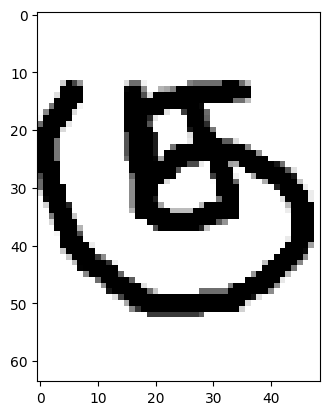

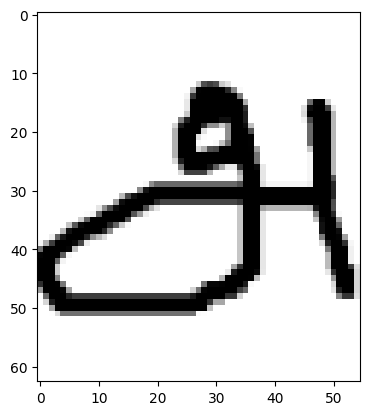

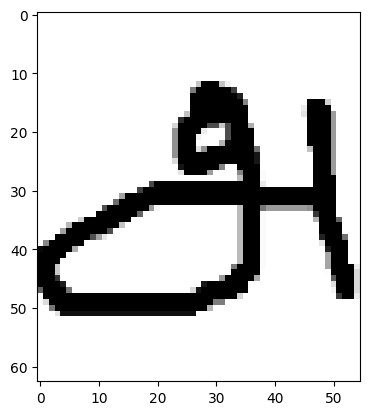

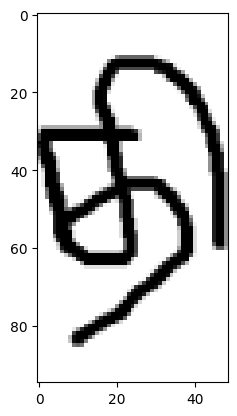

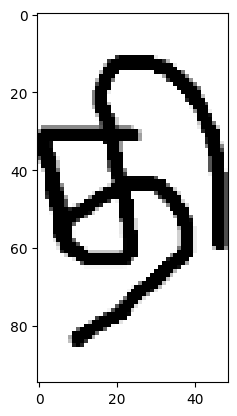

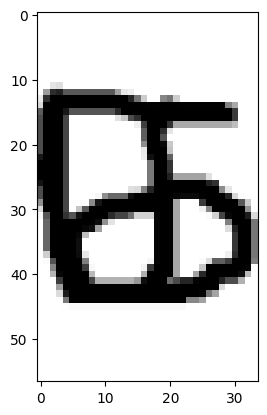

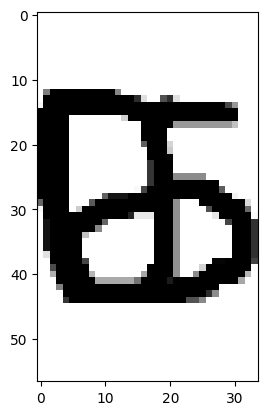

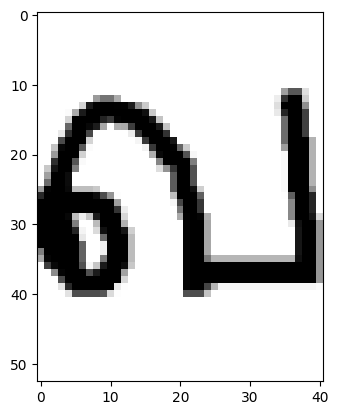

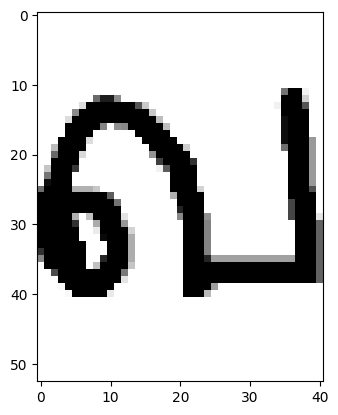

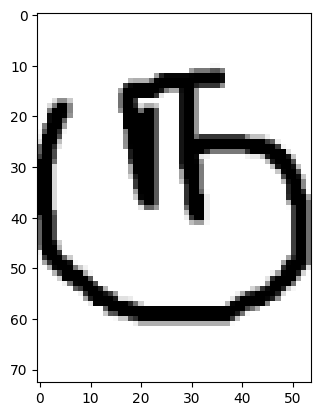

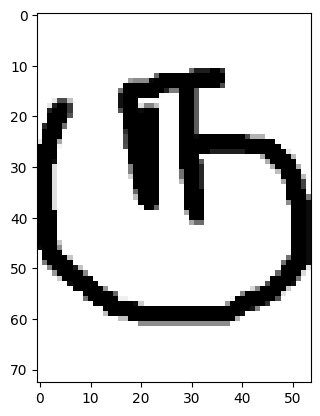

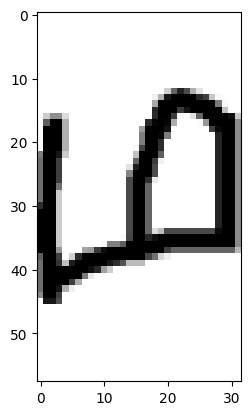

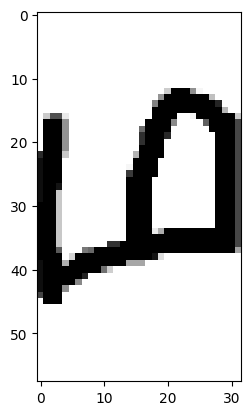

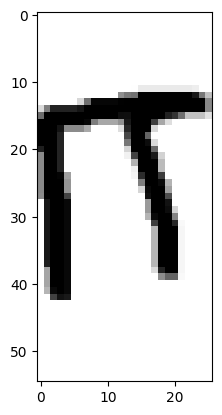

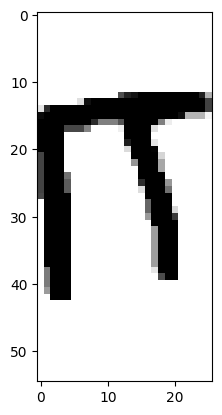

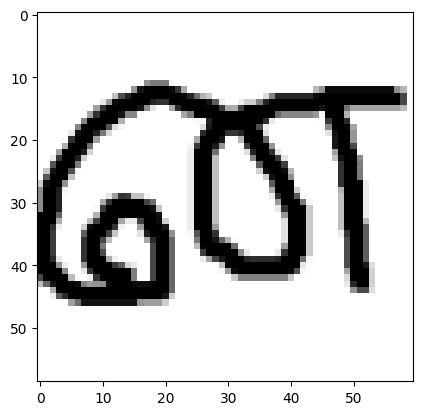

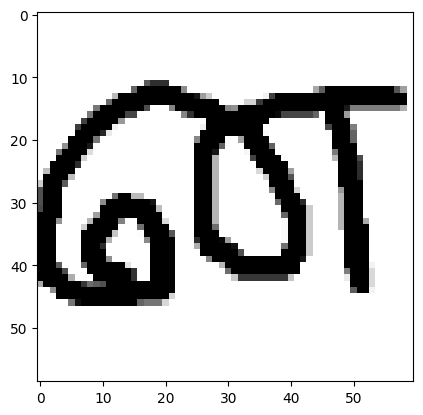

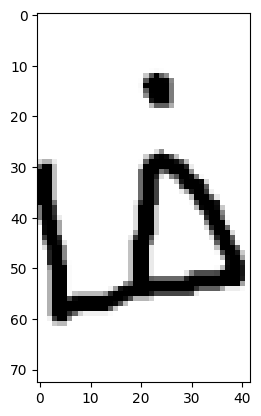

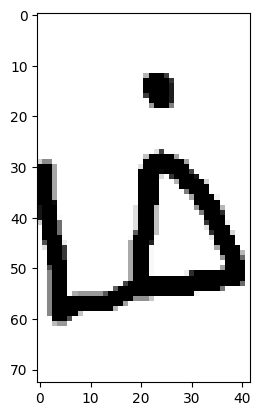

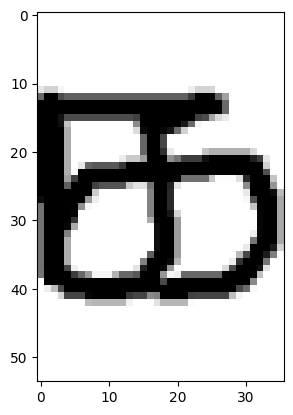

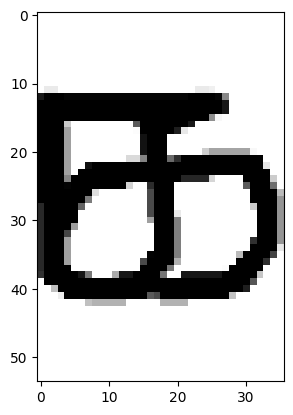

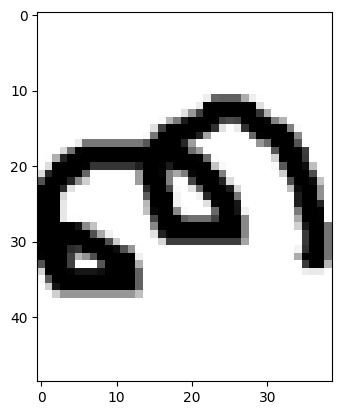

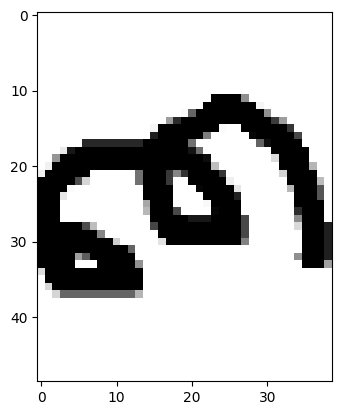

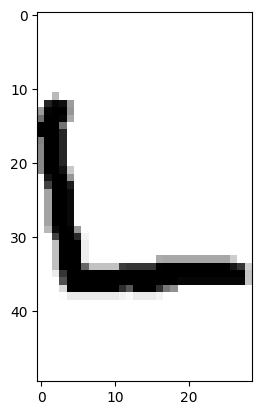

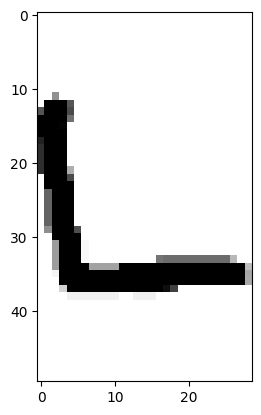

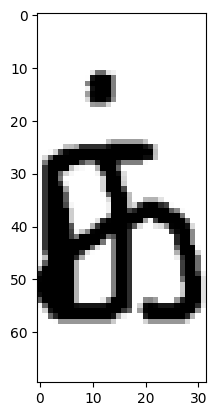

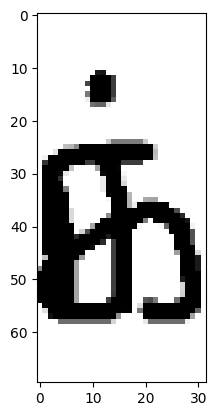

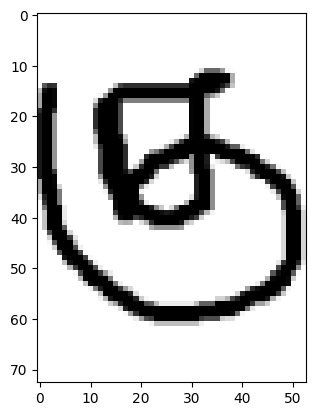

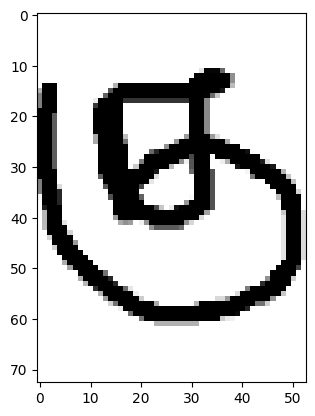

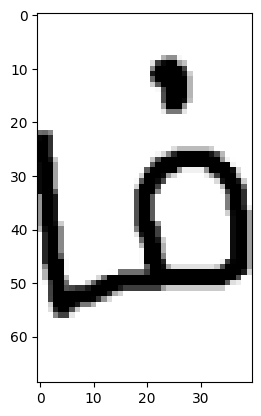

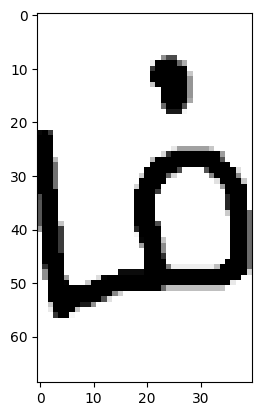

In [3]:
from word_segmentation import *
from letter_segmentation import *
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
from tamil_character_recognition import *
from class_unicode_mapper import *
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

sentence = []
resized_sentence = []
word_segmentations_list = generate_word_images("D:/hari files/project/sf_project/sf_project/src/Datasets/handwritten_images/image12.png")
for word in word_segmentations_list:
    letter_segmentation_list = generate_letter_segmentation(word)
    sentence.append(letter_segmentation_list)

for word in sentence:
    resized_letter_list = []
    for letter in word:
        # Convert to PIL image
        plt.imshow(letter)
        plt.show()
        img_pil = Image.fromarray(cv2.cvtColor(letter, cv2.COLOR_BGR2RGB))

        # Enhance contrast
        img_contrast = ImageEnhance.Contrast(img_pil)
        enhanced_img = img_contrast.enhance(2)
        plt.imshow(enhanced_img)
        plt.show()

        # Convert back to numpy array
        enhanced_img_np = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)

        # Convert the image to grayscale
        gray_img = cv2.cvtColor(enhanced_img_np, cv2.COLOR_BGR2GRAY)

        # Find the top boundary
        top_boundary = 0
        for row in range(gray_img.shape[0]):
            if np.any(gray_img[row] < 10):  # Assuming black pixels have values close to 0
                top_boundary = row
                break

        # Find the bottom boundary
        bottom_boundary = gray_img.shape[0]
        for row in range(gray_img.shape[0]-1, -1, -1):
            if np.any(gray_img[row] < 10):  # Assuming black pixels have values close to 0
                bottom_boundary = row
                break

        # Crop the image
        cropped_img = enhanced_img_np[top_boundary:bottom_boundary, :]
        try:
            resized_img = cv2.resize(cropped_img, (64, 64), interpolation=cv2.INTER_NEAREST_EXACT)
        except:
            continue

        resized_letter_list.append(resized_img)
    resized_sentence.append(resized_letter_list)


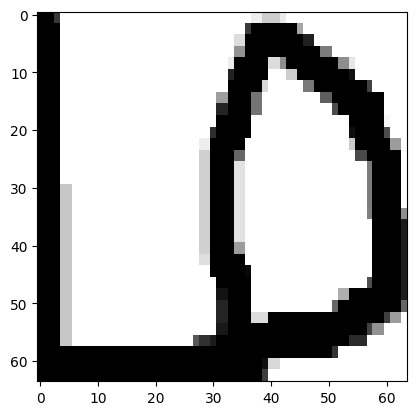

1/1 [==============================] - 0s 142ms/step
ம


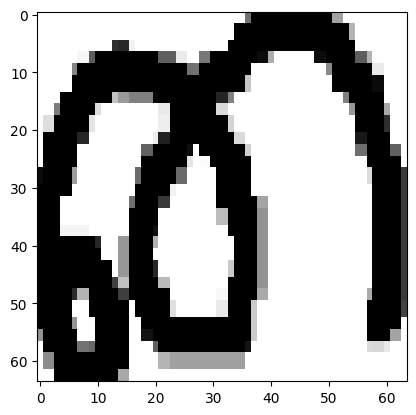

1/1 [==============================] - 0s 30ms/step
ை


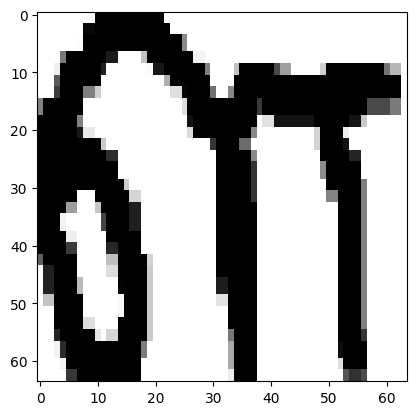

1/1 [==============================] - 0s 40ms/step
ள


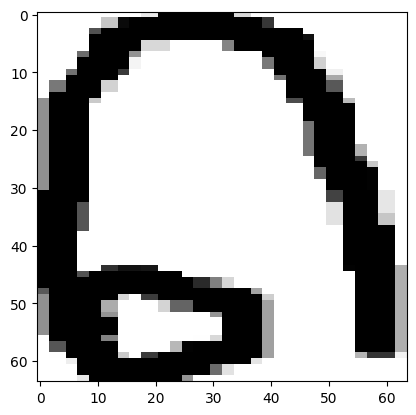

1/1 [==============================] - 0s 30ms/step
ெ


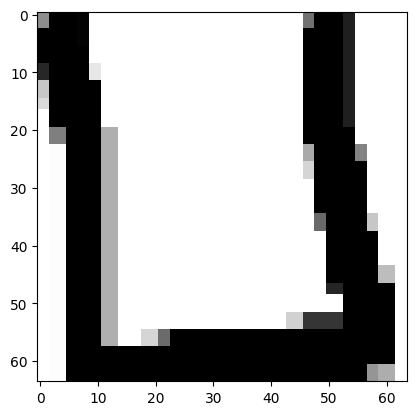

1/1 [==============================] - 0s 37ms/step
ப


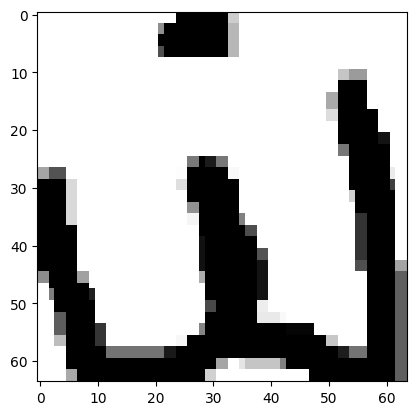

1/1 [==============================] - 0s 29ms/step
ய்


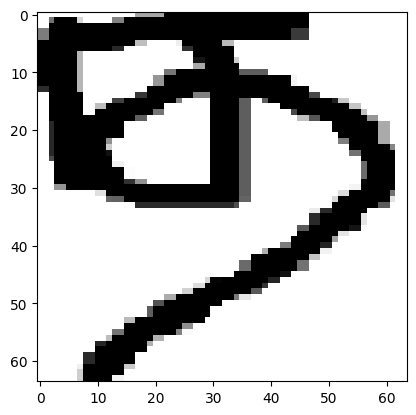

1/1 [==============================] - 0s 35ms/step
த


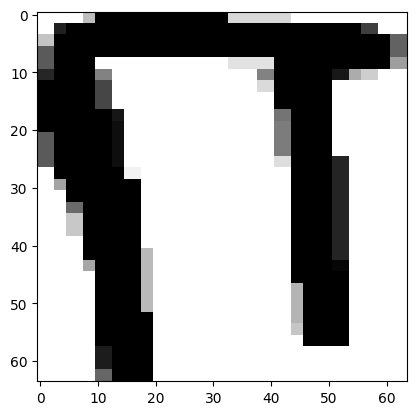

1/1 [==============================] - 0s 29ms/step
ா


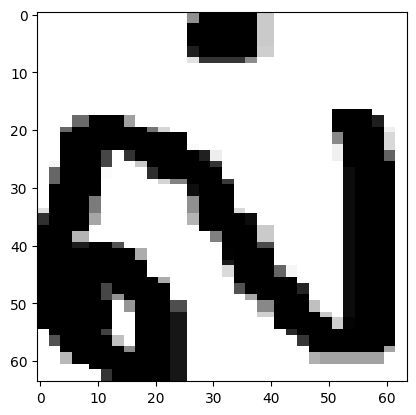

1/1 [==============================] - 0s 29ms/step
ல்


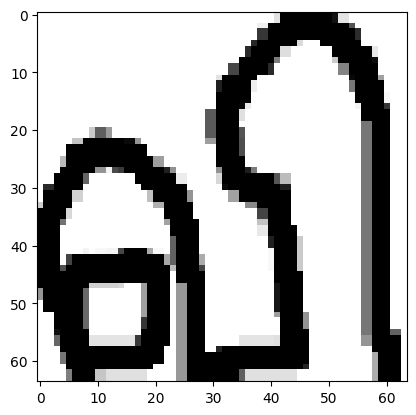

1/1 [==============================] - 0s 51ms/step
வி


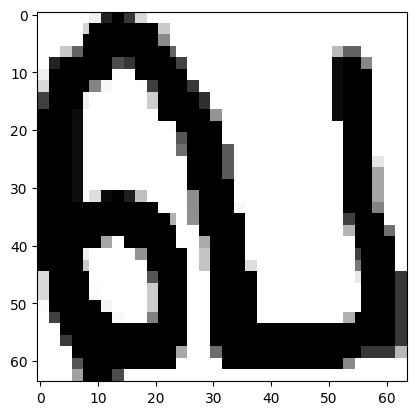

1/1 [==============================] - 0s 32ms/step
வ


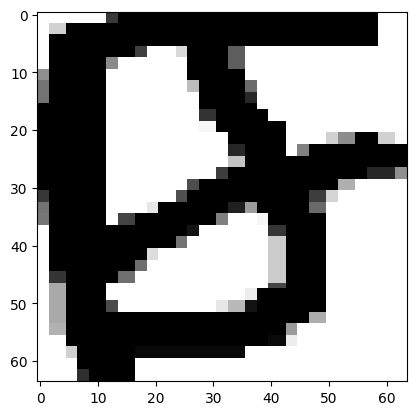

1/1 [==============================] - 0s 55ms/step
ச


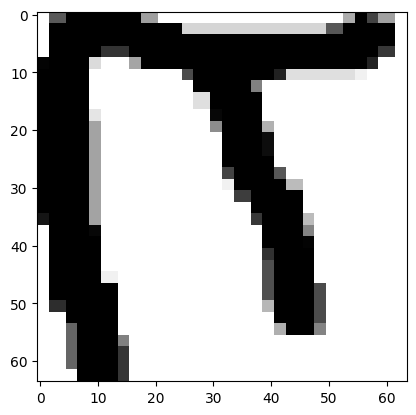

1/1 [==============================] - 0s 37ms/step
ா


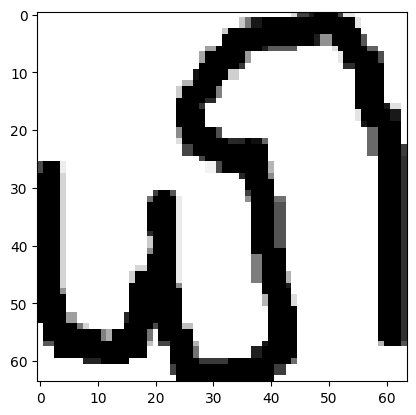

1/1 [==============================] - 0s 30ms/step
யி


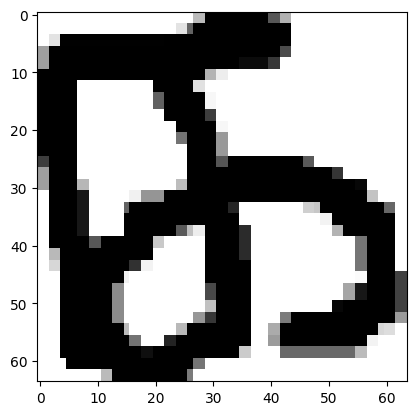

1/1 [==============================] - 0s 49ms/step
க


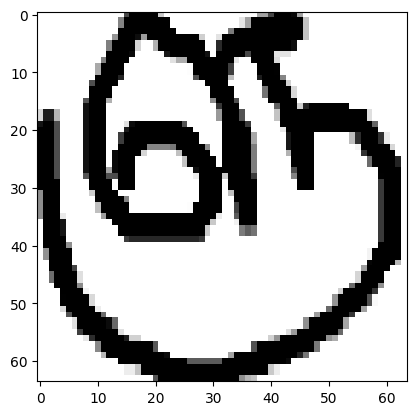

1/1 [==============================] - 0s 80ms/step
ளு


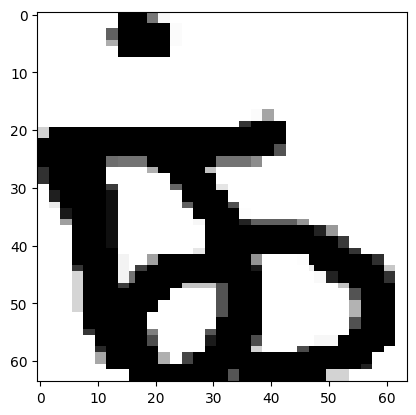

1/1 [==============================] - 0s 28ms/step
க்


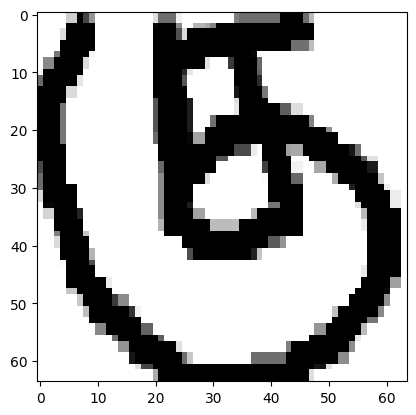

1/1 [==============================] - 0s 31ms/step
கு


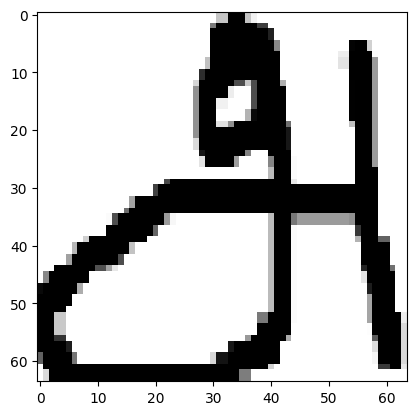

1/1 [==============================] - 0s 29ms/step
அ


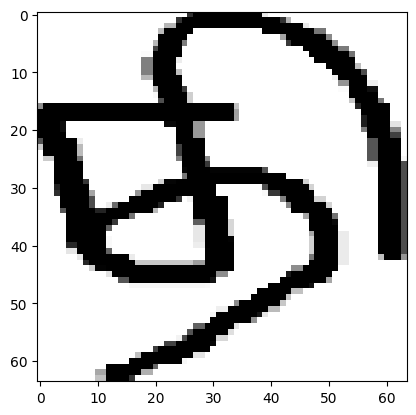

1/1 [==============================] - 0s 28ms/step
தி


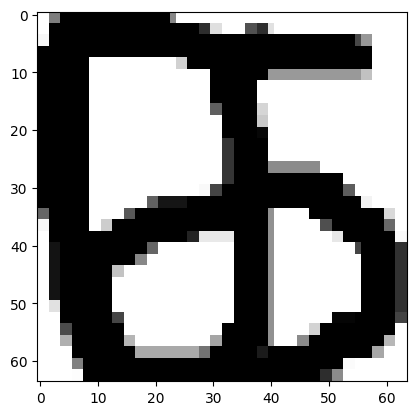

1/1 [==============================] - 0s 29ms/step
க


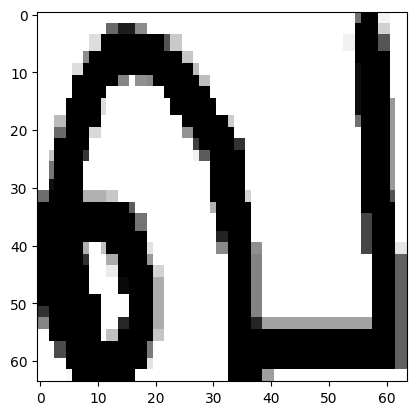

1/1 [==============================] - 0s 30ms/step
வ


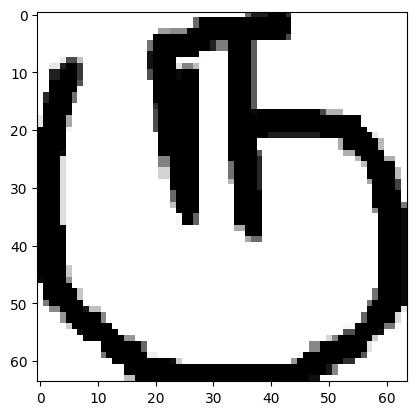

1/1 [==============================] - 0s 32ms/step
ரு


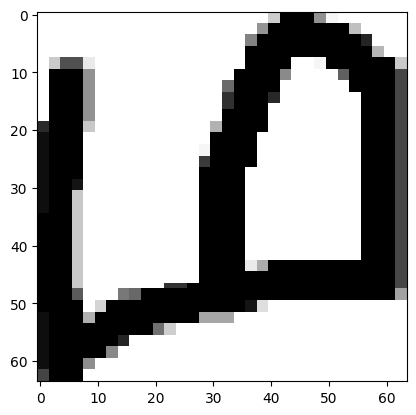

1/1 [==============================] - 0s 30ms/step
ம


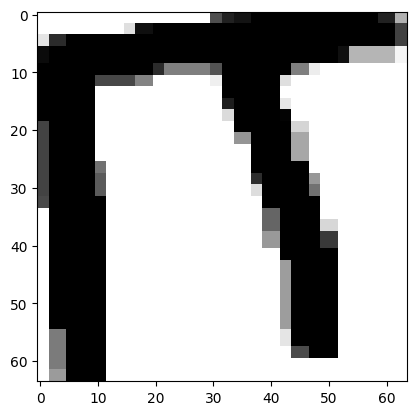

1/1 [==============================] - 0s 36ms/step
ா


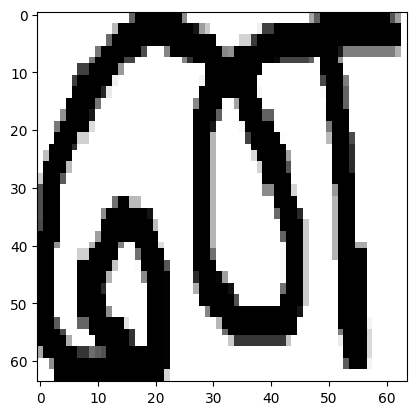

1/1 [==============================] - 0s 42ms/step
ன


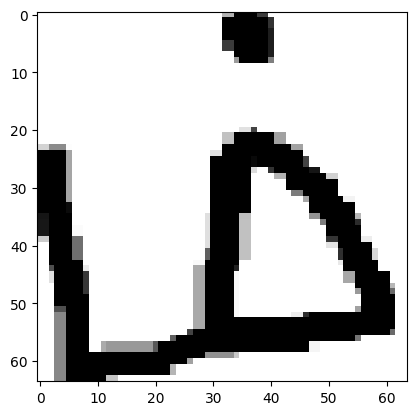

1/1 [==============================] - 0s 26ms/step
ம்


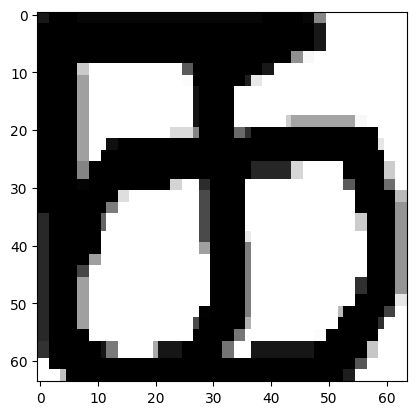

1/1 [==============================] - 0s 30ms/step
க


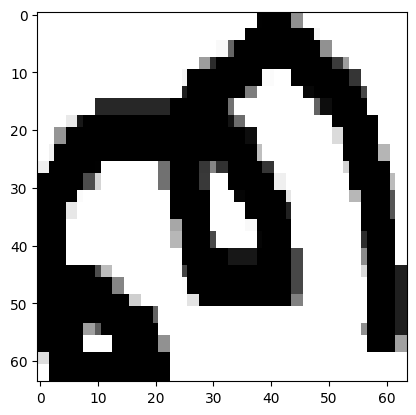

1/1 [==============================] - 0s 35ms/step
ை


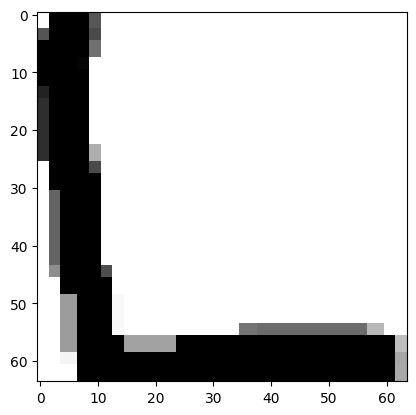

1/1 [==============================] - 0s 28ms/step
ட


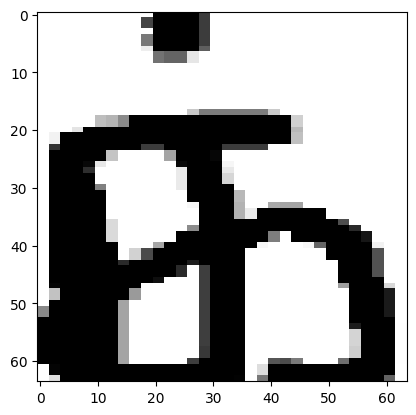

1/1 [==============================] - 0s 41ms/step
க்


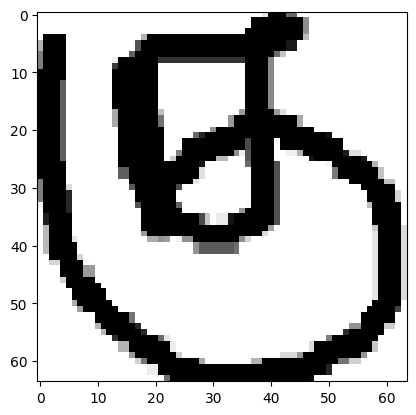

1/1 [==============================] - 0s 30ms/step
கு


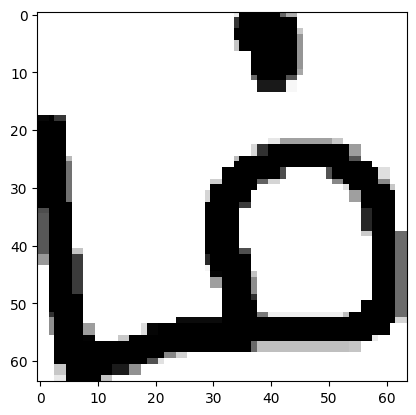

1/1 [==============================] - 0s 33ms/step
ம்
மைள ெபய்தால் விவசாயிகளுக்கு அதிக வருமானம் கைடக்கும் 


In [4]:
string = ""
for word in resized_sentence:
    for letter in word:
        plt.imshow(letter)
        plt.show()
        predicted_class = letter_image_to_class(letter)
        string += get_tamil_character(predicted_class)
    string += " "
print(string)

In [5]:
def reorder1(s):
    s = list(s)
    for i in range(len(s)):
        try:
            if(s[i + 2]):
                if (s[i] == "ெ" and s[i + 2] == "ா"):
                    s[i] = s[i + 1]
                    s[i + 1] = "ொ"
                    s[i + 2] = ""
        except IndexError:
            s = "".join(s)
            return s
    s = "".join(s)
    return s

def reorder2(s):
    s = list(s)
    s2 = list(s.copy())
    for i in range(len(s)):
        if (s[i] == "ை"):
            s2[i], s2[i + 1] = s2[i + 1], s2[i]
    s2 = "".join(s2)
    return s2
        
def reorder3(s):
    if(len(s) < 3):
        return s
    s = list(s)
    for i in range(len(s)):
        try:
            if(s[i + 2]):
                if (s[i] == "ே" and s[i + 2] == "ா"):
                    s[i] = s[i + 1]
                    s[i + 1] = "ோ"
                    s[i + 2] = ""
        except IndexError:
            s = "".join(s)
            return s
    s = "".join(s)
    return s

def reorder4(s):
    s = list(s)
    s2 = list(s.copy())
    for i in range(len(s)):
        try:
            if (s[i] == "ெ" and s[i + 2] != "ா"):
                s2[i], s2[i + 1] = s2[i + 1], s2[i]
        except IndexError:
            s = "".join(s)
            return s
    s2 = "".join(s2)
    return s2

def reorder5(s):
    s = list(s)
    s2 = list(s.copy())
    for i in range(len(s)):
        try:
            if (s[i] == "ே" and s[i + 2] != "ா"):
                s2[i], s2[i + 1] = s2[i + 1], s2[i]
        except IndexError:
            s = "".join(s)
            return s
    s2 = "".join(s2)
    return s2

def reorder6(s):
    s = list(s)
    for i in range(len(s)):
        try:
            if (s[i] == "ெ" and s[i + 2] == "ள"):
                s[i] = s[i + 1]
                s[i + 1] = "ௌ"
                s[i + 2] = ""
                s = "".join(s)
                return s
        except IndexError:
            s = "".join(s)
            return s
    s = "".join(s)
    return s


In [6]:
def reorder(s):
    dup = s
    r1 = reorder1(s)
    if(r1 != dup):
        return r1
    r2 = reorder2(s)
    if(r2 != dup):
        return r2
    r3 = reorder3(s)
    if(r3 != dup):
        return r3
    r4 = reorder4(s)
    if(r4 != dup):
        return r4
    r5 = reorder5(s)
    if(r5 != dup):
        return r5
    r6 = reorder6(s)
    if(r6 != dup):
        return r6
    return dup

In [7]:
string_list = string.split()
for i in range(len(string_list)):
    string_list[i] = reorder(string_list[i])

new_string = ""
for s in string_list:
    new_string = new_string + s + " "

print(new_string)

மளை பெய்தால் விவசாயிகளுக்கு அதிக வருமானம் கடைக்கும் 
